Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE" and remove every line containing the expression: "raise ..." (if you leave such a line your code will not run).

Do not remove any cell from the notebook you downloaded. You can add any number of cells (and remove them if not more necessary). 

## IMPORTANT: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!!!

Fill in your name and id number (numero matricola) below:

In [1]:
NAME = "Marco Mustacchi"
ID_number = int("2054137")

import IPython
assert IPython.version_info[0] >= 3, "Your version of IPython is too old, please update it."

---

## HOMEWORK #3

### Non linear models for classification 

In this notebook we are going to explore the use of SVM and Neural Networks for image classification. We are going to use the famous MNIST dataset, that is a dataset of handwritten digits. We get the data from mldata.org, that is a public repository for machine learning data.

In [2]:
# Load the required packages
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

In the following cell we will import the MNIST dataset. The `fetch_openml` function works differently depending on your version of scikit-learn. In particular, if you have the version $0.24$ or higher, you need to add the argument `as_frame` and set it to `False`. Choose the correct line below (you can also try both of them: the wrong one will generate an error).

In [3]:
#load the MNIST dataset and let's normalize the features so that each value is in [0,1]
## Load data from https://www.openml.org/d/554 - may take some time

# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
# CHOOSE BETWEEN:
X, Y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)
# OR:
# X, Y = fetch_openml('mnist_784', version=1, return_X_y=True)

print(f'Each image is represented as vector of shape {X[0].shape}')
print(f'The image is represented in gray scale levels {X[0]}')
print(f'Here it is a label: {Y[0]}')

# Rescale the data
X = X / 255.

Each image is represented as vector of shape (784,)
The image is represented in gray scale levels [  0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   3.  18.
  18.  18. 126. 136. 175.  26. 166. 255. 247. 127.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.  30.  36.

In a classification problem it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset, so that we work with _balanced_ datasets.
We can achieve this by setting the “stratify” argument of the function "train_test_split" to the Y component of our dataset.

We are going to use 500 samples in the train dataset, the remaining ones are used for testing.

In [4]:
from sklearn.model_selection import train_test_split

m_t = 500
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 500, Labels and frequencies: 
 [('0', 49), ('1', 56), ('2', 50), ('3', 51), ('4', 49), ('5', 45), ('6', 49), ('7', 52), ('8', 49), ('9', 50)]
Lenght test dataset: 69500, Labels and frequencies: 
 [('0', 6854), ('1', 7821), ('2', 6940), ('3', 7090), ('4', 6775), ('5', 6268), ('6', 6827), ('7', 7241), ('8', 6776), ('9', 6908)]


In [5]:
# Function to plot a digit and print the corresponding label
def plot_digit(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print(f"LABEL: {labels[index]}")
    return

INPUT:


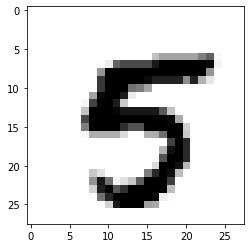

LABEL: 5
INPUT:


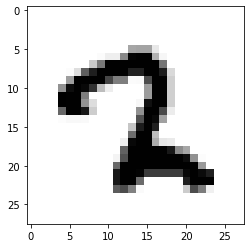

LABEL: 2


In [6]:
#let's try the plotting function
plot_digit(x_train, y_train, 100)
plot_digit(x_test, y_test, 40000)

## TO DO 1
SVM with cross validation to pick the best model. Use SVC from sklearn.svm and GridSearchCV from sklearn.model_selection (5-fold cross-validation).

Print the best parameters found as well as the best score obtained by the 'optimal' model.
Choose the grid: depending on the kernel you are using different hyper-parameters are needed (C, gamma, ...). 
You do not need to use more than 5 values for each hyper-parameter (otherwise the cell could be very slow). 

In [7]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV


def compute_best_SVM_with_CV(kernel_type : str, parameters : dict, x_train : np.ndarray, y_train : np.ndarray) -> tuple:
    '''
    Use Cross validation to find the best SVM on the given parameters. Return the best parameters set together with 
    the corresponding score. Return also the scores for all the other parameters given as input.
    :param kernel_type: Type of kernel (i.e. linear, rbf, poly)
    :param parameters: Dict containing kernel parameters (e.g. {'C': [1, 10, 100, 1000], 'gamma': [0.01, 0.001], ...})
    :param x_train: Train dataset
    :param y_train: Train labels
    
    :returns: (best_param, best_score, all_scores)
        WHERE:
        best_param: best parameter set (this is a dictionary)
        best_score: best score obtained for the given parameters (float)
        all_scores: all scores computed for each parameter (np.ndarray)
    '''
    SVM_model = SVC(kernel=kernel_type)
    # Use GridSearchCV to find the best parameter set.
    # YOUR CODE HERE
    # raise NotImplementedError() # Remove this line
    SVM_CV = GridSearchCV(estimator =  SVM_model, cv = 5, param_grid= parameters)
    SVM_CV.fit(x_train, y_train)
    
    print('#####################################')
    print(f'RESULTS for {kernel_type} KERNEL\n')
    # Store the best parameters set and print them
    print("Best parameters set found:")
    best_param = SVM_CV.best_params_
    # YOUR CODE HERE
    # raise NotImplementedError() # Remove this line
    print(best_param)
    
    # Store and print the score of the best parameters set
    print("\nScore with best parameters:")
    best_score = SVM_CV.best_score_
    # YOUR CODE HERE
    # raise NotImplementedError() # Remove this line
    print(best_score)
    
    # Store and print all the scores for the given parameters (average of the validation scores)
    print("\nAll scores on the grid:")
    all_scores = (SVM_CV.cv_results_)['mean_test_score']
    # YOUR CODE HERE
    # raise NotImplementedError() # Remove this line
    print(all_scores)
    
    return best_param, best_score, all_scores

# Choose the grid for parameters of the linear SVM kernel
linear_parameters = {'C': [0.1, 1, 10, 100, 1000]}
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
best_param_lin, best_score_lin, all_scores_lin = compute_best_SVM_with_CV('linear', linear_parameters, x_train, y_train)
# Choose the grid for parameters of the rbf SVM kernel
rbf_parameters = {'C': [0.1, 1, 10, 100], 'gamma': [0.0001, 0.001, 0.01, 0.1]}
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
best_param_rbf, best_score_rbf, all_scores_rbf = compute_best_SVM_with_CV('rbf', rbf_parameters, x_train, y_train)
# Choose the grid for parameters of the poly SVM kernel (do not forget to choose the degree)
poly_parameters = {'C': [0.1, 1, 10, 100], 'gamma': [0.001, 0.01, 0.1, 1], 'degree': [2,3,4,5]}
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
best_param_poly, best_score_poly, all_scores_poly = compute_best_SVM_with_CV('poly', poly_parameters, x_train, y_train)

#####################################
RESULTS for linear KERNEL

Best parameters set found:
{'C': 0.1}

Score with best parameters:
0.842

All scores on the grid:
[0.842 0.838 0.838 0.838 0.838]
#####################################
RESULTS for rbf KERNEL

Best parameters set found:
{'C': 10, 'gamma': 0.01}

Score with best parameters:
0.876

All scores on the grid:
[0.112 0.112 0.466 0.112 0.112 0.724 0.86  0.608 0.74  0.864 0.876 0.648
 0.864 0.844 0.876 0.648]
#####################################
RESULTS for poly KERNEL

Best parameters set found:
{'C': 0.1, 'degree': 2, 'gamma': 0.1}

Score with best parameters:
0.8600000000000001

All scores on the grid:
[0.112 0.388 0.86  0.852 0.112 0.28  0.81  0.81  0.112 0.224 0.758 0.758
 0.112 0.194 0.676 0.676 0.112 0.814 0.852 0.852 0.112 0.71  0.81  0.81
 0.112 0.57  0.758 0.758 0.112 0.462 0.676 0.676 0.388 0.86  0.852 0.852
 0.112 0.804 0.81  0.81  0.112 0.728 0.758 0.758 0.112 0.636 0.676 0.676
 0.814 0.852 0.852 0.852 0.28  0.81  0.8

In [8]:
assert type(best_param_rbf) == dict
assert type(best_score_rbf) == np.float64
assert np.prod(np.array([len(params) for params in rbf_parameters.values()])) == len(all_scores_rbf)


In [9]:
# TODO 2: 
# Get training and test error for the best SVM model obtained from CV (you need to choose across different kernels 
# too). You just need to look at the best model for each kernel and choose the best one (you can do this by hand).

best_kernel_type, best_parameters = 'rbf', best_param_rbf
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
best_SVM = SVC(kernel=best_kernel_type, **best_parameters)
best_SVM.fit(x_train, y_train)

# Compute training and test error for this model (use the usual sklearn built-in functions seen in previous homeworks)
training_error, test_error = 1. - best_SVM.score(x_train,y_train), 1. - best_SVM.score(x_test,y_test)
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

print (f"Best SVM training error: {training_error}")
print (f"Best SVM test error: {test_error}")

Best SVM training error: 0.0
Best SVM test error: 0.1090791366906475


In [10]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


### TO DO 3
Now we use feed-forward neural networks for classification. You can use the Multi-Layer-Perceptron (the multi-layer structure we have seen in class, see http://scikit-learn.org/stable/modules/neural_networks_supervised.html).

Note that we fix the starting random state so to make the runs reproducible. Use max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, learning_rate_init=.1. Pick few architectures and use the default activation function (ReLU).

In [11]:
# test different architectures: 
# - 1 hidden layer with 10 nodes, 
# - 1 hidden layer with 50 nodes, 
# - 2 hidden layer with 10 nodes each, 
# - 2 hidden layer with 50 nodes each
# feel free to change this and test more/different structures

parameters = {'hidden_layer_sizes': [(10,), (50,), (10,10,), (50,50,)]}

mlp = MLPClassifier(max_iter=1000, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number, learning_rate_init=.1)

# Use GridSearchCV to find the best mlp using 5 fold CV.
mlp_CV = GridSearchCV(estimator=mlp, cv=5, param_grid=parameters).fit(x_train, y_train)
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

print('#####################################')
print ('RESULTS FOR NN\n')
# Store the best parameters set and print them
print("Best parameters set found:")
mlp_best_param = mlp_CV.best_params_
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
print(mlp_best_param)

# Store and print the score of the best parameters set
print("\nScore with best parameters:")
mlp_best_score = mlp_CV.best_score_
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
print(mlp_best_score)

# Store and print all the scores for the given parameters (average of the validation scores)
print("\nAll scores on the grid:")
mlp_all_scores = (mlp_CV.cv_results_)['mean_test_score']
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line
print(mlp_all_scores)

#####################################
RESULTS FOR NN

Best parameters set found:
{'hidden_layer_sizes': (50, 50)}

Score with best parameters:
0.8540000000000001

All scores on the grid:
[0.82  0.852 0.782 0.854]


In [12]:
assert type(mlp_best_param) == dict
assert type(mlp_best_score) == np.float64

## TO DO 4


Now get training and test error for a NN with best parameters from above. We use verbose=True
in input so to see how loss changes in iterations (see how this changes if the number of iterations is changed)

Iteration 1, loss = 2.21138342
Iteration 2, loss = 1.74183924
Iteration 3, loss = 1.16890322
Iteration 4, loss = 0.77956914
Iteration 5, loss = 0.82939500
Iteration 6, loss = 0.49008730
Iteration 7, loss = 0.31831594
Iteration 8, loss = 0.26749616
Iteration 9, loss = 0.18659882
Iteration 10, loss = 0.15766800
Iteration 11, loss = 0.09770252
Iteration 12, loss = 0.06659643
Iteration 13, loss = 0.04749888
Iteration 14, loss = 0.03299832
Iteration 15, loss = 0.02538483
Iteration 16, loss = 0.01950856
Iteration 17, loss = 0.01505886
Iteration 18, loss = 0.01214709
Iteration 19, loss = 0.01017997
Iteration 20, loss = 0.00866838
Iteration 21, loss = 0.00748687
Iteration 22, loss = 0.00662992
Iteration 23, loss = 0.00597658
Iteration 24, loss = 0.00549609
Iteration 25, loss = 0.00504525
Iteration 26, loss = 0.00465613
Iteration 27, loss = 0.00439474
Iteration 28, loss = 0.00410649
Iteration 29, loss = 0.00388440
Iteration 30, loss = 0.00366762
Iteration 31, loss = 0.00354249
Iteration 32, los

(Text(0.5, 0, 'Iter'), Text(0, 0.5, 'Loss'))

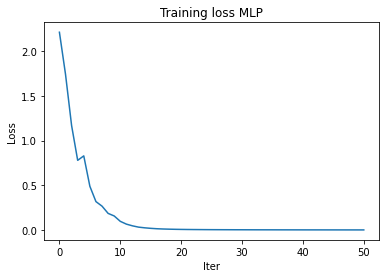

In [13]:
# Get training and test error for the best NN model found using CV
max_iter = 1000
mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True)

# ADD CODE: FIT MODEL & COMPUTE TRAINING AND TEST ERRORS
mlp.fit(x_train, y_train)
training_error, test_error = 1. - mlp.score(x_train,y_train), 1. - mlp.score(x_test,y_test)
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

print ('\nRESULTS FOR BEST NN\n')

print ("Best NN training error: %f" % training_error)
print ("Best NN test error: %f" % test_error)

plt.plot(mlp.loss_curve_, label='Training Loss')
plt.title('Training loss MLP')
plt.xlabel('Iter'), plt.ylabel('Loss')

In [14]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


## TO DO  5
Write a function to find and plot the first digit (in x_test) that is missclassified by NN and correctly classified by SVM.

Write a function to compute the confusion matrix for the predictions of a model (on testset). If you are not familiar with what a confusion matrix is, have a look at this link: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html . You are not allowed to use sklearn to create the confusion matrix BUT you can compare your solution with the sklearn implementation to check you wrote it right (see assert checks). 

INPUT:


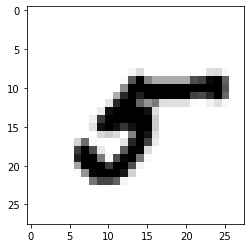

LABEL: 5
SVM confusion matrix:
[[6573    2   69   26   16   59   65   15   25    4]
 [   2 7648   31   32    2   32    8   11   36   19]
 [  89  178 5930  178  132   32  167  103  123    8]
 [  58   67  206 5991   10  451   13   49  172   73]
 [   5   69   42    7 6160   13   75   20   16  368]
 [  72  127   27  292   77 5334  104   27  165   43]
 [ 134   46  163   11   74  101 6261    3   33    1]
 [  35  144  110   27  176   29    1 6425   17  277]
 [  39  193  116  176   68  270   81   46 5647  140]
 [  52   63  101  107  360   47    6  174   48 5950]]
MLP confusion matrix:
[[6451    1   99   25   17  158   43   22   27   11]
 [   2 7566   59   37    4   40   12   13   77   11]
 [  90  162 5726  206  139   19  189  121  279    9]
 [  96   28  305 5707    8  553   22   41  209  121]
 [  12   74   67   34 5949   20  157   42   69  351]
 [ 165  115   77  422  135 4620  125   51  434  124]
 [  95   39  256    8   88  105 6125    0  111    0]
 [  42  150  173   72  186   20    2 6263   3

(Text(0.5, 1.0, 'SVM'), Text(0.5, 1.0, 'MLP'))

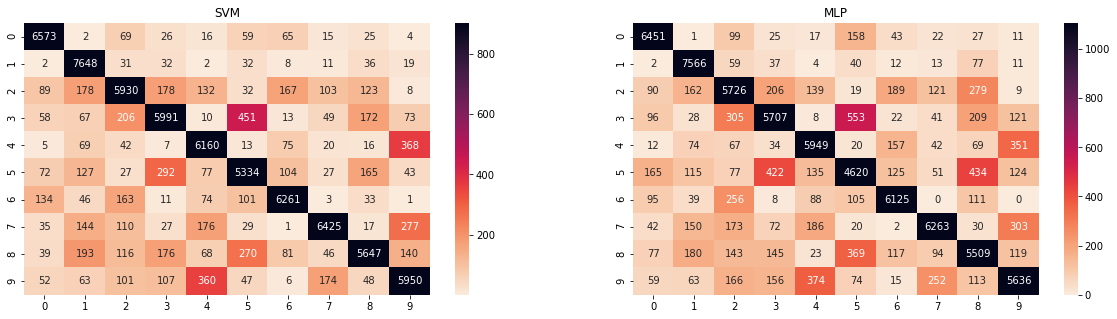

In [15]:
def find_and_print_first_mismatched_prediction(SVM_prediction : np.ndarray, NN_prediction : np.ndarray,
                                               x_test : np.ndarray, y_test : np.ndarray) -> int:
    '''
    Function to find and print the first digit that is missclassified by NN and correctly classified by SVM.
    :param SVM_prediction: SVM predicitons.
    :param NN_prediction: MLP predicitons.
    :param x_test: Test set inputs.
    :param y_test: Test set labels.
    
    :returns:
        i: returns the first index in which there is a mismatch between NN_prediction and true labels but no mismatch 
           between SVM_prediction and true labels. 
    '''
    i = 0
    found = False
    while ((not found) and (i<len(y_test))):
        # YOUR CODE HERE
        # raise NotImplementedError() # Remove this line
        if ((NN_prediction[i] != y_test[i]) and (SVM_prediction[i] == y_test[i])):
            found = True
            plot_digit(x_test, y_test, i)
            break
        i = i+1
    return i
    
    
def confusion_matrix_by_hand(true_labels : np.ndarray, predicted_labels : np.ndarray) -> np.ndarray:
    '''
    Function used to compute the confusion matrix given true and predicted labels. 
    :param true_labels: True labels.
    :param predicted_labels: Predicted labels (note this function does not require to know which model generated 
                             the predictions).
    
    :returns:
        confusion_matrix: Confusion matrix for the given true and predicted labels.
    '''
    labels = np.unique(true_labels) # Number of classes
    map_labels_to_index = {label:i for i, label in enumerate(labels)}
    confusion_matrix = np.zeros((len(labels), len(labels)))
    
    expected = true_labels.astype(int)
    predicted = predicted_labels.astype(int)
    for exp,pred in zip(expected, predicted):
        confusion_matrix[exp][pred] += 1
    # YOUR CODE HERE
    # raise NotImplementedError() # Remove this line
    return confusion_matrix.astype(int)


# Let's test our functions
SVM_prediction = best_SVM.predict(x_test)
NN_prediction = mlp.predict(x_test)

first_index = find_and_print_first_mismatched_prediction(SVM_prediction, NN_prediction, x_test, y_test)

SVM_CM = confusion_matrix_by_hand(y_test, SVM_prediction)
MLP_CM = confusion_matrix_by_hand(y_test, NN_prediction)

print(f'SVM confusion matrix:\n{SVM_CM}')
print(f'MLP confusion matrix:\n{MLP_CM}')

# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
SVM_CM_df = pd.DataFrame(SVM_CM, index = labels, columns = labels)
MLP_CM_df = pd.DataFrame(MLP_CM, index = labels, columns = labels)

# Plot confusion matrices
def cap(df):
    df_numpy = df.to_numpy(dtype=int, copy=True)
    np.fill_diagonal(df_numpy, np.zeros(df_numpy.shape[0]))
    return np.amax(df_numpy)
fig, axes = plt.subplots(1,2, figsize=(20,5))
sn.heatmap(SVM_CM_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=cap(SVM_CM_df)*2, fmt='d')
sn.heatmap(MLP_CM_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=cap(MLP_CM_df)*2, fmt='d')
axes[0].set_title('SVM'), axes[1].set_title('MLP')
# Opional line to plot a better table if you see first and last row halved
#[ax.set_yticks(list(range(len(labels)+1))) for ax in axes]

In [16]:
from sklearn.metrics import confusion_matrix
skl_confusion_matrix_SVM = confusion_matrix(y_test, SVM_prediction)
skl_confusion_matrix_NN = confusion_matrix(y_test, NN_prediction)

assert np.sum(skl_confusion_matrix_SVM - SVM_CM) == 0
assert np.sum(skl_confusion_matrix_NN - MLP_CM) == 0


## TO DO 6: explain the results you got (max 5 lines)
According to the cross-validation results, would you choose SVMs or NNs when 500 data points are available for training? Is this a good choice, given the results on the test set?

Looking at the confusion matrices what to do you observe? On which classes each model is more likely to make mistakes? 

(Answer in the next cell, no need to add code)

In [17]:
# YOUR CODE HERE
# According to the cross-validation results, I would choose the SVM's method because we got an higher score. Since after 
# fitting the models, we get a lower test error with SVM, the previous choice can be considered correct.
# Looking at the confusion matrices, we can see that most of the classes are classified correctly, in fact the highest 
# values are along the main diagonal. However, with both methods, the models make more errors especially between classes 9 
# and 4, and between classes 5 and 3. In fact, these numbers are visually similar to each others.

## More Data

Now let's do the same but using more data points for training SVM and NN. For SVM we are going to use the best hyperparameters set (kernel, C, gamma, ...) found using 500 data points. For NNs we use the same best architecture as before, but you can try more if you want! 

In [18]:
#let restart the random generator with the given seed
np.random.seed(ID_number)

m_t = 60000
x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=m_t/len(Y), random_state=ID_number, stratify=Y)

print(f'Lenght train dataset: {len(y_train)}, Labels and frequencies: \n {list(zip(*np.unique(y_train, return_counts=True)))}')
print(f'Lenght test dataset: {len(y_test)}, Labels and frequencies: \n {list(zip(*np.unique(y_test, return_counts=True)))}')

Lenght train dataset: 60000, Labels and frequencies: 
 [('0', 5917), ('1', 6752), ('2', 5991), ('3', 6121), ('4', 5849), ('5', 5411), ('6', 5894), ('7', 6251), ('8', 5850), ('9', 5964)]
Lenght test dataset: 10000, Labels and frequencies: 
 [('0', 986), ('1', 1125), ('2', 999), ('3', 1020), ('4', 975), ('5', 902), ('6', 982), ('7', 1042), ('8', 975), ('9', 994)]


In [19]:
# As we did with the first HW let's use a decorator to measure time 
from collections import defaultdict
running_times = defaultdict(list)

def measure_time(function):
    def wrap(*args, **kw):
        import time 
        t_start = time.time()
        result = function(*args, **kw)
        t_end = time.time()
        running_times[type(args[0]).__name__].append(t_end - t_start)
        return result
    return wrap

@measure_time
def fit_classification_model(model, x_train, y_train):
    model.fit(x_train, y_train)

In [20]:
n_data = [250, 500, 1000, 2000, 5000, 7500]
svm_train_err, svm_test_err = [], [] 
mlp_train_err, mlp_test_err = [], [] 
for n in n_data: 
    print(f'Processing with {n} data ...')
    # Initialize models according to the best we got using 500 data
    svm = SVC(kernel=best_kernel_type, **best_parameters)
    mlp = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, 
                        random_state=ID_number, learning_rate_init=.1)
    
    # fit svc
    fit_classification_model(svm, x_train[:n], y_train[:n])
    # get svc train and test error
    svm_train_err.append(1. - svm.score(x_train[:n], y_train[:n]))
    svm_test_err.append(1. - svm.score(x_test, y_test))
    
    # fit mlp
    fit_classification_model(mlp, x_train[:n], y_train[:n])
    # get mlp train and test error
    mlp_train_err.append(1. - mlp.score(x_train[:n], y_train[:n]))
    mlp_test_err.append(1. - mlp.score(x_test, y_test))

Processing with 250 data ...
Processing with 500 data ...
Processing with 1000 data ...
Processing with 2000 data ...
Processing with 5000 data ...
Processing with 7500 data ...


(<matplotlib.legend.Legend at 0x253b3e96a00>, Text(0.5, 1.0, 'Training Time'))

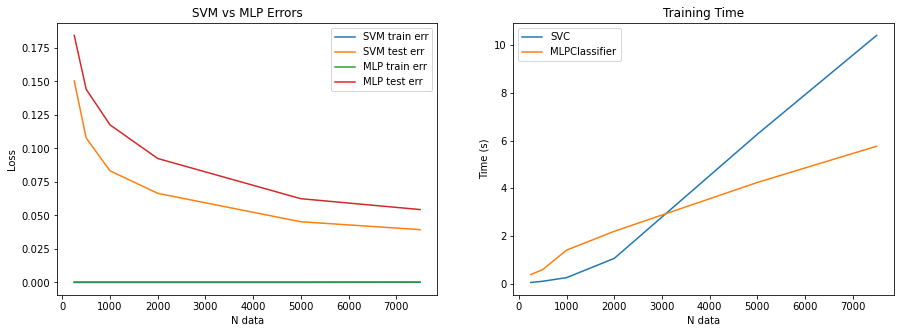

In [21]:
fig, axes = plt.subplots(1,2, figsize=(15, 5))
axes[0].plot(n_data, np.array(svm_train_err), label='SVM train err')
axes[0].plot(n_data, np.array(svm_test_err), label='SVM test err')
axes[0].plot(n_data, np.array(mlp_train_err), label='MLP train err')
axes[0].plot(n_data, np.array(mlp_test_err), label='MLP test err')
axes[0].set_xlabel('N data'), axes[0].set_ylabel('Loss')
axes[0].legend(), axes[0].set_title('SVM vs MLP Errors')

for model, times in running_times.items():
    axes[1].plot(n_data, times, label=model)
axes[1].set_xlabel('N data'), axes[1].set_ylabel('Time (s)')
axes[1].legend(), axes[1].set_title('Training Time')

# TODO 7: Complete dataset

In the following we will compare the last studied regression method (e.g. NN, with Multi-Layer Perceptron) with one from the very first homework.

Among the different linear classifiers, we choose logistic regression (with standard parameters from scikit-learn but the number of iteration), given the good performances we obtained some weeks ago.

In [22]:
from sklearn import linear_model

# Fit and test a logistic regression model
max_iter = 1000
log_reg = linear_model.LogisticRegression(max_iter=max_iter).fit(x_train, y_train)
training_error_lr, test_error_lr = 1. - log_reg.score(x_train, y_train), 1. - log_reg.score(x_test, y_test)
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

print (f"Best logistic regression training error: {training_error_lr:.4f}")
print (f"Best logistic regression test error: {test_error_lr:.4f}")

Best logistic regression training error: 0.0607
Best logistic regression test error: 0.0788


We now learn the NN. Below we use the same best architecture as before (found with 500 data), feel free to try larger ones (and to use again CV), or smaller ones if it takes too much time. (We suggest that you use 'verbose=True' so have an idea of how long it takes to run 1 iteration). 

*Note*: If you do again CV to choose the best architecture remember to save the best set of parameters into the variable: "mlp_best_param".

In [23]:
#get training and test error for the best NN model from CV
best_mlp_large = MLPClassifier(**mlp_best_param, max_iter=max_iter, alpha=1e-4, solver='sgd', tol=1e-4, random_state=ID_number,
                    learning_rate_init=.1, verbose=True) 

best_mlp_large.fit(x_train, y_train)

training_error, test_error = 1. - best_mlp_large.score(x_train, y_train), 1. - best_mlp_large.score(x_test, y_test)
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

print ('\nRESULTS FOR BEST NN\n')

print (f"Best NN training error: {training_error:.4f}")
print (f"Best NN test error: {test_error:.4f}")

Iteration 1, loss = 0.29386222
Iteration 2, loss = 0.12645538
Iteration 3, loss = 0.09667285
Iteration 4, loss = 0.08176671
Iteration 5, loss = 0.06880495
Iteration 6, loss = 0.06109440
Iteration 7, loss = 0.05277223
Iteration 8, loss = 0.04719948
Iteration 9, loss = 0.04400045
Iteration 10, loss = 0.03926846
Iteration 11, loss = 0.03671649
Iteration 12, loss = 0.03237206
Iteration 13, loss = 0.02980010
Iteration 14, loss = 0.02709004
Iteration 15, loss = 0.02331997
Iteration 16, loss = 0.02483554
Iteration 17, loss = 0.02489763
Iteration 18, loss = 0.02145010
Iteration 19, loss = 0.02117075
Iteration 20, loss = 0.02066099
Iteration 21, loss = 0.01778846
Iteration 22, loss = 0.01734355
Iteration 23, loss = 0.02010324
Iteration 24, loss = 0.02077741
Iteration 25, loss = 0.01993089
Iteration 26, loss = 0.01764657
Iteration 27, loss = 0.01153051
Iteration 28, loss = 0.01165635
Iteration 29, loss = 0.01567687
Iteration 30, loss = 0.01625036
Iteration 31, loss = 0.01522526
Iteration 32, los

In [24]:
assert type(training_error) == np.float64
assert type(test_error) == np.float64


(Text(0.5, 1.0, 'MLP Train'), Text(0.5, 1.0, 'MLP Test'))

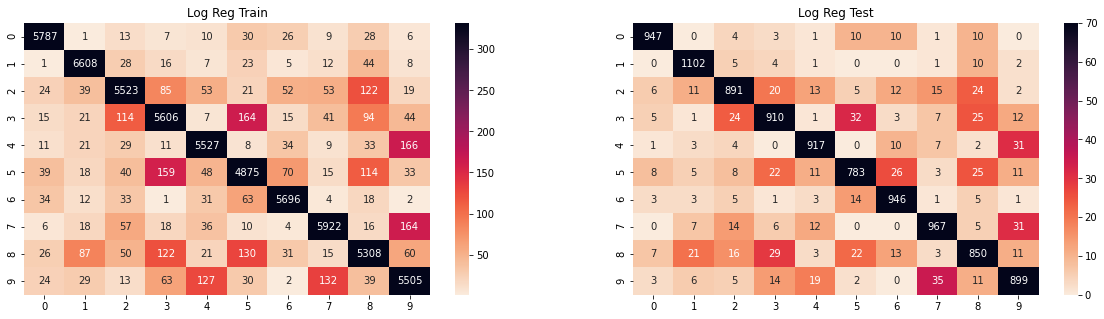

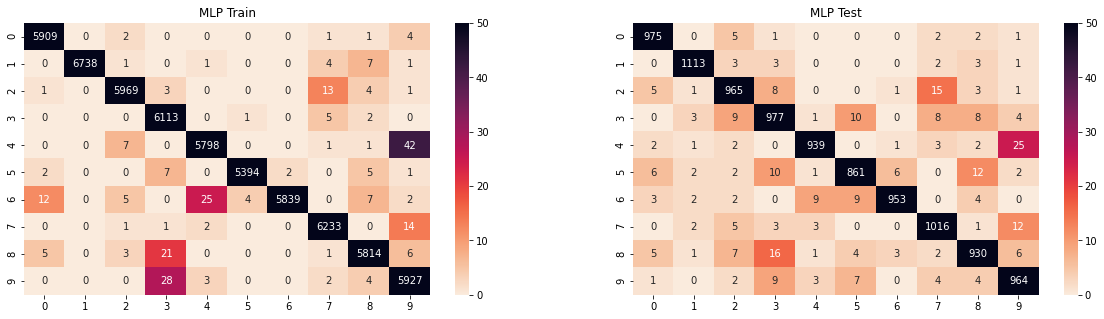

In [25]:
## TODO 8: compute the confusion matrices both on train and test set for Logistic regression (trained on 60k)
# and MLP (trained on 60k).

# Log Reg Confusion matrices
log_reg_CM_train, log_reg_CM_test = confusion_matrix_by_hand(y_train, log_reg.predict(x_train)), confusion_matrix_by_hand(y_test, log_reg.predict(x_test))
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line

# mlp
mlp_CM_train, mlp_CM_test = confusion_matrix_by_hand(y_train, best_mlp_large.predict(x_train)), confusion_matrix_by_hand(y_test, best_mlp_large.predict(x_test))
# YOUR CODE HERE
# raise NotImplementedError() # Remove this line


# Convert confusion matrices to pandas data frames
labels = np.unique(y_test)
log_reg_CM_train_df = pd.DataFrame(log_reg_CM_train, index = labels, columns = labels)
log_reg_CM_test_df = pd.DataFrame(log_reg_CM_test, index = labels, columns = labels)

mlp_CM_train_df = pd.DataFrame(mlp_CM_train, index = labels, columns = labels)
mlp_CM_test_df = pd.DataFrame(mlp_CM_test, index = labels, columns = labels)

# Plot confusion matrices
fig, axes = plt.subplots(1,2, figsize=(20,5))
sn.heatmap(log_reg_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=cap(log_reg_CM_train_df)*2, fmt='d')
sn.heatmap(log_reg_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=cap(log_reg_CM_test_df)*2, fmt='d')
axes[0].set_title('Log Reg Train'), axes[1].set_title('Log Reg Test')
# Opional line to plot a better table if you see first and last row halved
# [ax.set_yticks(list(range(len(labels)+1))) for ax in axes]

fig, axes = plt.subplots(1,2, figsize=(20,5))
sn.heatmap(mlp_CM_train_df, annot=True, ax=axes[0], cmap='rocket_r', vmax=cap(mlp_CM_test_df)*2, fmt='d')
sn.heatmap(mlp_CM_test_df, annot=True, ax=axes[1], cmap='rocket_r', vmax=cap(mlp_CM_test_df)*2, fmt='d')
axes[0].set_title('MLP Train'), axes[1].set_title('MLP Test')
# Opional line to plot a better table if you see first and last row halved
# [ax.set_yticks(list(range(len(labels)+1))) for ax in axes]

In [26]:
assert log_reg_CM_train.shape == (10, 10)
assert log_reg_CM_test.shape == (10, 10)
assert mlp_CM_train.shape == (10, 10)
assert mlp_CM_test.shape == (10, 10)


## TO DO 9
Compare and discuss:
- compare the computational time required to fit a SVM and a MLP. Which is faster as the number of data increase? Why? Can you apply both methods in the high data regime?
- the results from SVM m=7500 and NN with m=60000 training data points.
- the results from NN with m=500 and m=60000 training data points.
- What do you observe in the confusion matrices? Which are the hardest classes? Are the hardest and easiest classes the same both for mlp and logistic regression?

(Answer in the next cell, no need to write code)

In [27]:
# YOUR CODE HERE
# By comparing the computation times required by SVM and MLP, we can see that as the number of data increases, the second 
# method is faster. This is because with the SVM method the computation time increase more and more with the number of data
# points, the MLP method used stochastic gradient or more likely, the minibatch SGD that can handle the computation time 
# with large dataset. In addition, with MLP we can exploit the backpropagation algorithm to compute the gradients in a 
# more efficient way, thanks to the structure of the neural network. Bottom line, for large datasets it is preferable to 
# use the MLP method, while for smaller datasets it is better to use SVM which, as we have seen, produced a lower test 
# error.

# Comparing the results from SVM with m=7500 and NN with m=60000 training data points, we can see that the test errors are 
# very similar, ~0.0394 for SVM method and ~0.0307 for the NN method. 
# However, comparing the computational time, while SVM takes about 8 seconds, MLP runs for about 40 seconds.

# Comparing the results from NN with m=500 and m=60000 training data points, we can observe that in the first 
# case we get a lower training error, while in the second case we get a slightly higher training error.
# However, looking at the test error, with lower data points we get an higher test error, while in the second case a much 
# lower test error. This is expected, since we know that the larger is the training dataset, the better will be the 
# performance.

# From the confusion matrices's plot, we can easily see that the confusion matrix with respect to the training data is 
# better than that of the corresponding method with the test data.
# This is expected, since we train our model on training data, so it will perform better on train data rather than on test 
# data. In addition, comparing the confusion matrices of test set for logistic regression and MLP, we can observe that, the
# MLP method performs much better, but the hardest and easiest classes to classifiy are very similar in both case.
# In particular, the easiest class seems to be the 1st while the hardest class is the 5th.